Team Members: Eliesha Lai, Katelyn Vincent, Sunny Vidhani

# Image Translation

In [5]:
import xlrd
from google.cloud import vision
from google.cloud import vision_v1 as vision
import os
import pandas as pd
import urllib
from skimage import io
from PIL import Image
from PIL import ImageTk, Image
from IPython.display import Image, HTML
import requests
from io import BytesIO
import googletrans
from googletrans import Translator
from PIL import Image
import urllib.request
%matplotlib inline

In [6]:
global img

def imagetranslate():    
    # get user image
    print("Hey there! Want to learn what life looks like in a different language?  I can help!")
    image_url = input("\nFirst I need a URL for an image...  \n") 

    # get user language
    chosen = input("\nThanks!  What language are you interested in learning more about today?  \n")
    chosen_language = chosen.lower()

    # get image from url
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))

    # get photo labels
    Application_Credentials = 'text analysis 3-c27b4c3afcd0.json'
    os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = Application_Credentials
    client = vision.ImageAnnotatorClient()
    image = vision.Image()
    image.source.image_uri = image_url

    response = client.label_detection(image=image)
    labels = response.label_annotations
    eng_labels = []

    for label in labels:
        eng_labels.append(label.description)

    # translator
    language_dictionary = {value : key for (key, value) in googletrans.LANGUAGES.items()}
    translator = Translator()
    chosen_language_symb = language_dictionary.get(chosen_language)

    other_lang_labels = []
    for counter,value in enumerate(eng_labels):
        translated2 = translator.translate(value, src = 'en', dest = chosen_language_symb)
        other_lang_labels.append(translated2.text)

    # show translation
    print ("\nHere's what's going on in your photo - in English and in {}!\n".format(chosen))
    for e, s in zip(eng_labels, other_lang_labels):
        print(e,'=',s)
        
    # show image
    return img

# Sample Output 1

Hey there! Want to learn what life looks like in a different language?  I can help!

First I need a URL for an image...  
https://www.nymetroparents.com/columnpic2/stress-free-birthdays.jpg?clear=1

Thanks!  What language are you interested in learning more about today?  
German

Here's what's going on in your photo - in English and in German!

Birthday party = Geburtstagsparty
Party hat = Partyhut
Birthday = Geburtstag
Child = Kind
Party = Party
Sweetness = Süße
Birthday cake = Geburtstagskuchen
Party supply = Partyversorgung
Event = Veranstaltung
Fun = Spaß


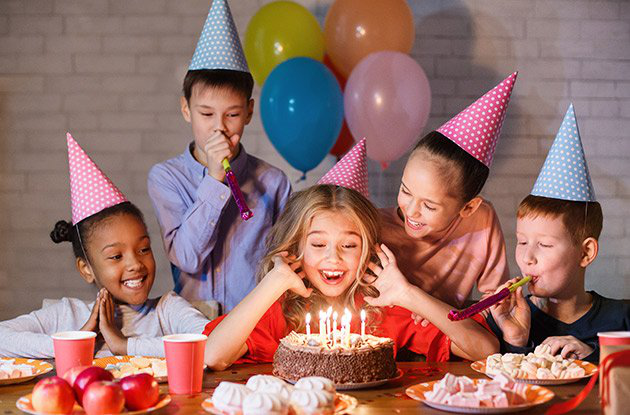

In [7]:
imagetranslate()

# Sample Output 2

Hey there! Want to learn what life looks like in a different language?  I can help!

First I need a URL for an image...  
https://www.thecocktailproject.com/sites/default/files/styles/recipe-slider-img/public/poolpartypunch_beauty-9578-Edit_web_0.jpg?itok=5ssL3cIE

Thanks!  What language are you interested in learning more about today?  
Japanese

Here's what's going on in your photo - in English and in Japanese!

Lemon-lime = レモンライム
Drink = ドリンク
Blue hawaii = ブルーハワイ
Blue lagoon = 青い珊瑚礁
Lemonade = レモネード
Non-alcoholic beverage = ノンアルコール飲料
Distilled beverage = 蒸留飲料
Spritzer = スプリッツァー
Cocktail = カクテル
Punch = パンチ


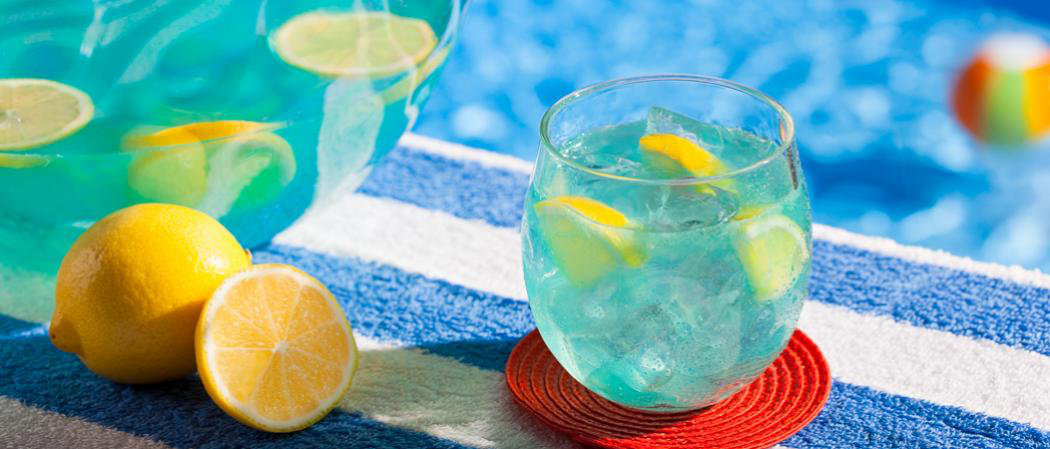

In [8]:
imagetranslate()

# Sample Output 3

Hey there! Want to learn what life looks like in a different language?  I can help!

First I need a URL for an image...  
https://www.history.com/.image/c_fill%2Ccs_srgb%2Cfl_progressive%2Ch_400%2Cq_auto:good%2Cw_620/MTY4ODE4ODA4MzY1MDAwNDY1/christmas-gettyimages-184652817.jpg

Thanks!  What language are you interested in learning more about today?  
Polish

Here's what's going on in your photo - in English and in Polish!

Christmas decoration = Dekoracja świąteczna
Christmas stocking = Skarpeta świąteczna
Christmas ornament = świąteczna ozdoba
Christmas = Boże Narodzenie
Interior design = Projektowanie wnętrz
Ornament = Ornament
Christmas eve = Wigilia
Tree = Drzewo
Christmas tree = drzewko świąteczne
Holiday = Święto


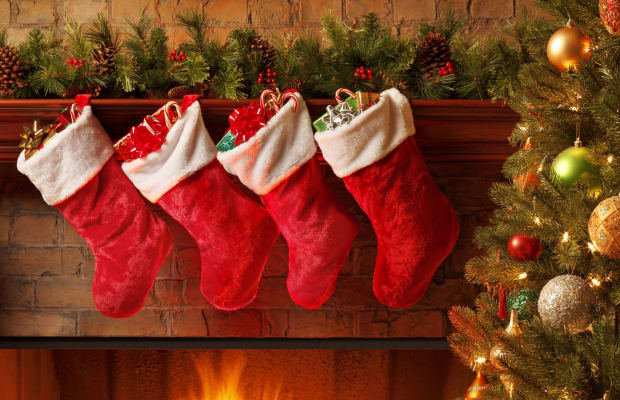

In [11]:
imagetranslate()